We're going to visualize the codebook that our VQVAE produced

VQVAE(
  encoder=Encoder(
    conv1=Conv1d(
      num_spatial_dims=1,
      weight=f32[512,80,3],
      bias=f32[512,1],
      in_channels=80,
      out_channels=512,
      kernel_size=(3,),
      stride=(2,),
      padding='SAME',
      dilation=(1,),
      groups=1,
      use_bias=True,
      padding_mode='ZEROS'
    ),
    conv2=Conv1d(
      num_spatial_dims=1,
      weight=f32[1024,512,3],
      bias=f32[1024,1],
      in_channels=512,
      out_channels=1024,
      kernel_size=(3,),
      stride=(2,),
      padding='SAME',
      dilation=(1,),
      groups=1,
      use_bias=True,
      padding_mode='ZEROS'
    ),
    conv3=Conv1d(
      num_spatial_dims=1,
      weight=f32[512,1024,1],
      bias=f32[512,1],
      in_channels=1024,
      out_channels=512,
      kernel_size=(1,),
      stride=(1,),
      padding='SAME',
      dilation=(1,),
      groups=1,
      use_bias=True,
      padding_mode='ZEROS'
    ),
    res1=ResBlock(
      conv1=Conv1d(
        num_spatial_dims=1,
    

/home/tugdual/miniconda3/envs/jaxtts/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


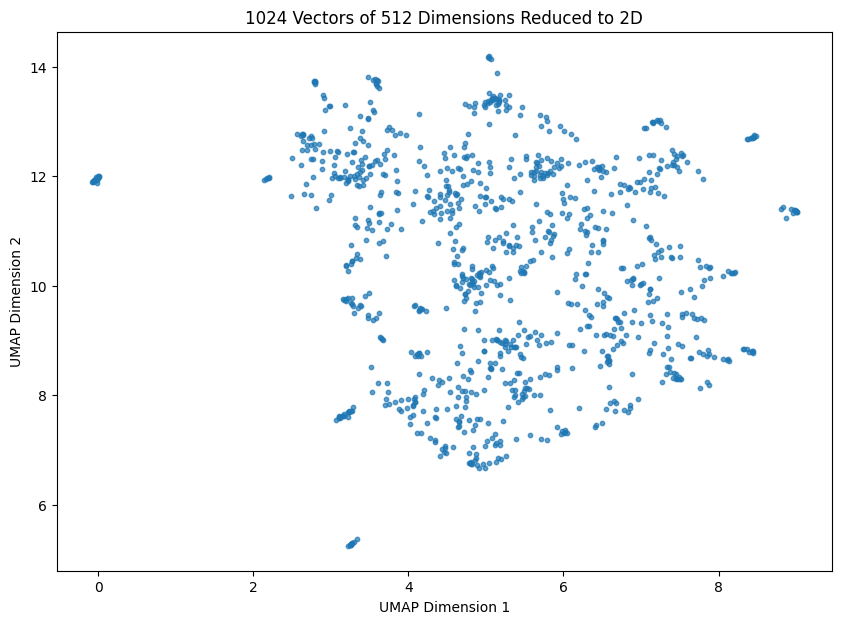

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
import equinox as eqx
from VQVAE import VQVAE
import jax

key = jax.random.PRNGKey(2)
model = VQVAE(key)
model = eqx.tree_deserialise_leaves("checkpoints/12800.eqx", model)
print(model)
# Sample data: 1024 vectors with 512 dimensions
# vectors = np.random.rand(1024, 512)
vectors = model.quantizer.codebook

# Reduce dimensionality to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
vectors_2d = reducer.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=10, alpha=0.7)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("1024 Vectors of 512 Dimensions Reduced to 2D")
plt.show()